# Micro-Credit Defaulter Model

## *Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. 

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

#### Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  

Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.

#### Descriptions of the features:
- label--Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn--mobile number of user
- aon--age on cellular network in days
- daily_decr30--Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90--Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30--Average main account balance over last 30 days
- rental90--Average main account balance over last 90 days
- last_rech_date_ma--Number of days till last recharge of main account
- last_rech_date_da--Number of days till last recharge of data account
- last_rech_amt_ma--Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30--Number of times main account got recharged in last 30 days
- fr_ma_rech30--Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30--Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30--Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30--Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90--Number of times main account got recharged in last 90 days
- fr_ma_rech90--Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90--Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90--Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90--Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30--Number of times data account got recharged in last 30 days
- fr_da_rech30--Frequency of data account recharged in last 30 days
- cnt_da_rech90--Number of times data account got recharged in last 90 days
- fr_da_rech90--Frequency of data account recharged in last 90 days
- cnt_loans30--Number of loans taken by user in last 30 days
- amnt_loans30--Total amount of loans taken by user in last 30 days
- maxamnt_loans30--maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30--Median of amounts of loan taken by the user in last 30 days
- cnt_loans90--Number of loans taken by user in last 90 days
- amnt_loans90--Total amount of loans taken by user in last 90 days
- maxamnt_loans90--maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90--Median of amounts of loan taken by the user in last 90 days
- payback30--Average payback time in days over last 30 days
- payback90--Average payback time in days over last 90 days
- pcircle--telecom circle
- pdate--date

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\Data file.csv")

In [4]:
df. head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [5]:
df.shape

(209593, 37)

Dataset had 209593 rows and 37 columns in total.

In [6]:
#DataSet Information: #df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Dataset had 37 columns:
- 21 columns are float datatype
- 13 columns are integer datatype
- 3 columns are object datatype

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

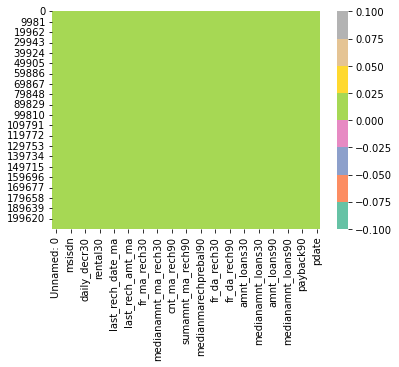

In [8]:
sns.heatmap(df.isnull(),cmap='Set2')

No null data is found in the dataset. We can check this with a heat map too for a good visualization and understanding.

In [9]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

- Above shows the number of unique elements/values present in each column.

In [11]:
#checking for unique values and their value counts
for col in df:
    print((col),df[col].unique())
    print(df[col].value_counts())
    print('--'*30)
    print('\n')

Unnamed: 0 [     1      2      3 ... 209591 209592 209593]
1         1
139733    1
139723    1
139724    1
139725    1
         ..
69869     1
69870     1
69871     1
69872     1
209593    1
Name: Unnamed: 0, Length: 209593, dtype: int64
------------------------------------------------------------


label [0 1]
1    183431
0     26162
Name: label, dtype: int64
------------------------------------------------------------


msisdn ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
------------------------------------------------------------


aon [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
95.000000        392
92.000000        362
96.000000        357
99.000000        35

In [12]:
# getting list of object data type column names:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names:
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['msisdn', 'pcircle', 'pdate']

Number Data Type Columns are:
 ['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [13]:
#since pdate is object we convert it in integer dtype by changing the Date into actual date format

df['pdate'] = pd.to_datetime(df['pdate'])
df.pdate.head()

0   2016-07-20
1   2016-08-10
2   2016-08-19
3   2016-06-06
4   2016-06-22
Name: pdate, dtype: datetime64[ns]

In [14]:
#Splitting time stamp format data to day, month & year

df["day"]=df["pdate"].dt.day
df["month"]=df["pdate"].dt.month
df["year"]=df["pdate"].dt.year
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,day,month,year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [15]:
from collections import Counter
Counter(df['pdate'])

Counter({Timestamp('2016-07-20 00:00:00'): 2842,
         Timestamp('2016-08-10 00:00:00'): 2178,
         Timestamp('2016-08-19 00:00:00'): 1132,
         Timestamp('2016-06-06 00:00:00'): 2631,
         Timestamp('2016-06-22 00:00:00'): 2906,
         Timestamp('2016-07-02 00:00:00'): 2910,
         Timestamp('2016-07-05 00:00:00'): 3127,
         Timestamp('2016-08-05 00:00:00'): 2298,
         Timestamp('2016-06-15 00:00:00'): 3033,
         Timestamp('2016-06-08 00:00:00'): 2580,
         Timestamp('2016-06-12 00:00:00'): 2936,
         Timestamp('2016-06-20 00:00:00'): 3099,
         Timestamp('2016-06-29 00:00:00'): 2832,
         Timestamp('2016-06-16 00:00:00'): 2824,
         Timestamp('2016-08-03 00:00:00'): 2213,
         Timestamp('2016-06-24 00:00:00'): 2785,
         Timestamp('2016-07-04 00:00:00'): 3150,
         Timestamp('2016-07-03 00:00:00'): 2905,
         Timestamp('2016-07-01 00:00:00'): 2954,
         Timestamp('2016-08-08 00:00:00'): 2428,
         Timestamp('

In [16]:
df.drop(['Unnamed: 0'],axis=1, inplace=True) #index column we also have already in our dataframe
df.drop(['msisdn'],axis=1, inplace=True) #contains Mobile numbers which wont add any value in ML
df.drop(['pcircle'],axis=1, inplace=True) #contains same value i.e 'UPW' in every row
df.drop(['pdate','year'],axis=1, inplace=True) #Already ahve split this column to day, month, year, and year has only one value 2016

In [17]:
print("Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print("Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (209593, 35)
Rows and Columns after dropping duplicates:  (209562, 35)


- Above we tried to see if there are any duplicate rows or columns, but there are no duplicate values.

## Data Visualization (EDA)

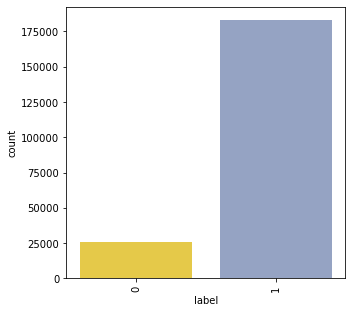

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(df['label'],palette='Set2_r')
plt.xticks(rotation=90)
plt.show()

- Around 180000 number of Non defaulters whereas almost 25000 number of defaulters are seen.
- It is highly imbalanced data set. 
- 0= Defaulter, 1= Non defaulter.

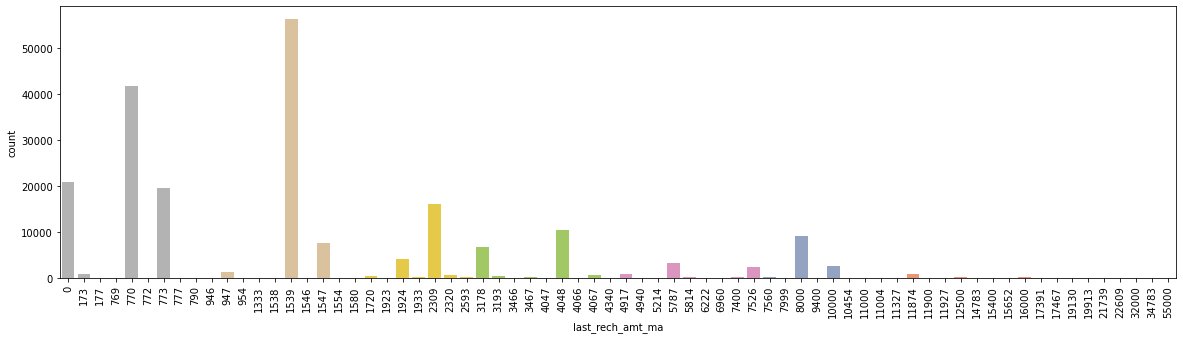

In [55]:
plt.figure(figsize=(20,5))
sns.countplot(df['last_rech_amt_ma'],palette='Set2_r')
plt.xticks(rotation=90)
plt.show()

Highest amount of last recharge of main account (in Indonesian Rupiah) was for 1539, followed by 770.

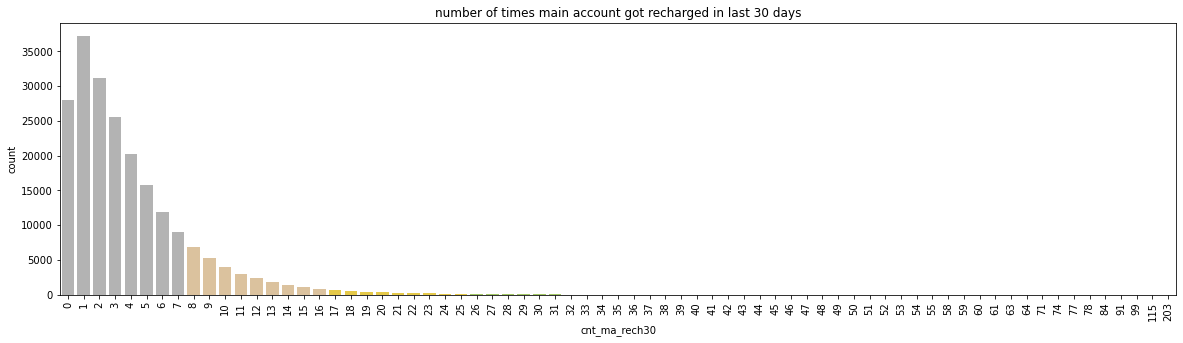

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(df['cnt_ma_rech30'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('number of times main account got recharged in last 30 days')
plt.show()

Highest number of times main account got recharged in last 30 days was 1 day.

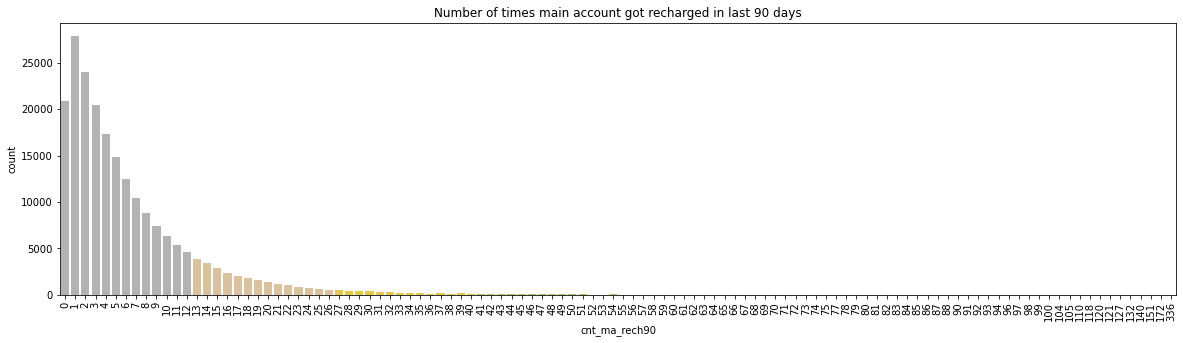

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(df['cnt_ma_rech90'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Number of times main account got recharged in last 90 days')
plt.show()

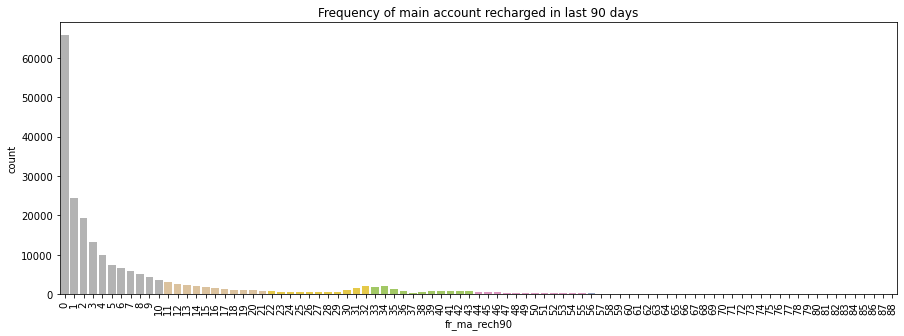

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(df['fr_ma_rech90'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Frequency of main account recharged in last 90 days')
plt.show()

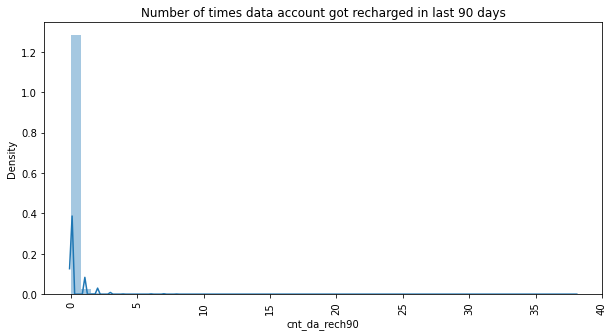

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df['cnt_da_rech90'])
plt.xticks(rotation=90)
plt.title('Number of times data account got recharged in last 90 days')
plt.show()

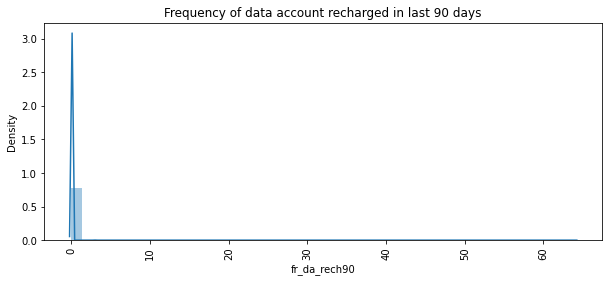

In [22]:
plt.figure(figsize=(10,4))
sns.distplot(df['fr_da_rech90'])
plt.xticks(rotation=90)
plt.title('Frequency of data account recharged in last 90 days')
plt.show()

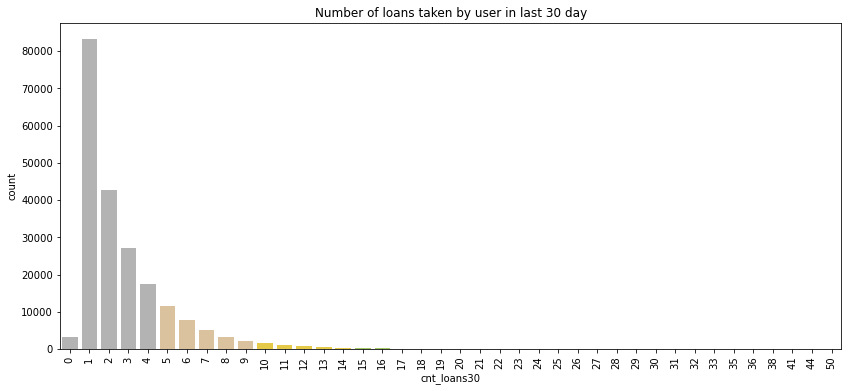

In [23]:
plt.figure(figsize=(14,6))
sns.countplot(df['cnt_loans30'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Number of loans taken by user in last 30 day')
plt.show()

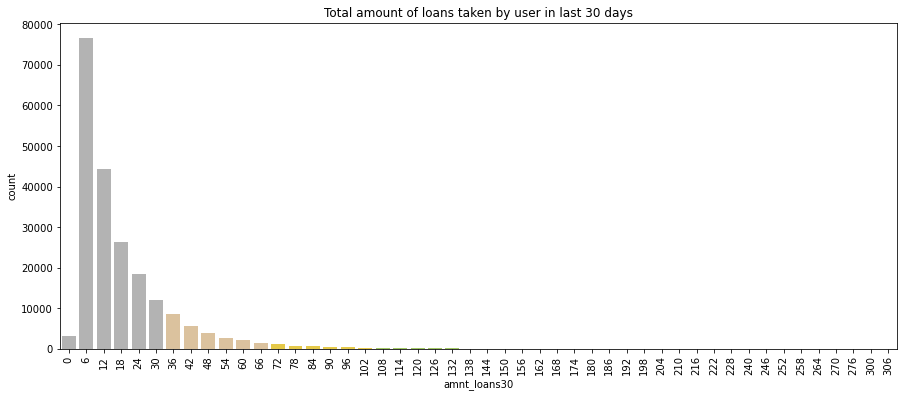

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(df['amnt_loans30'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Total amount of loans taken by user in last 30 days')
plt.show()

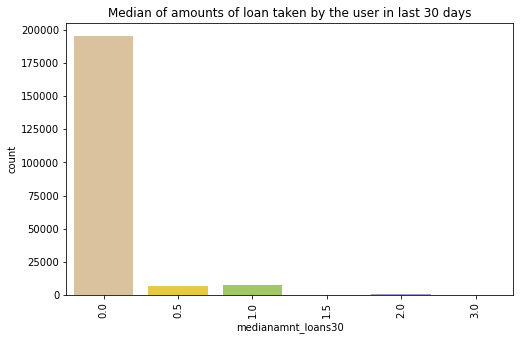

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df['medianamnt_loans30'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Median of amounts of loan taken by the user in last 30 days')
plt.show()

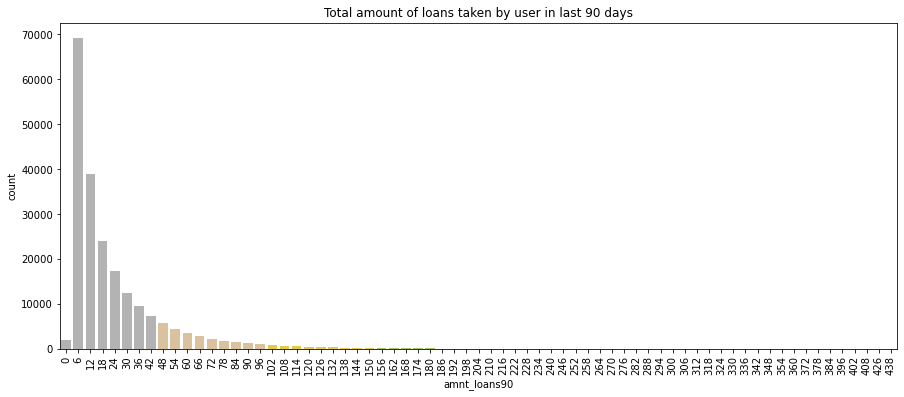

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(df['amnt_loans90'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Total amount of loans taken by user in last 90 days')
plt.show()

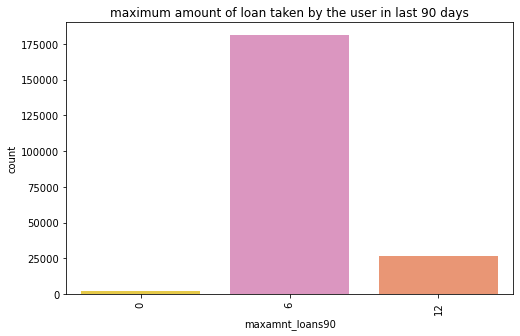

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['maxamnt_loans90'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('maximum amount of loan taken by the user in last 90 days')
plt.show()

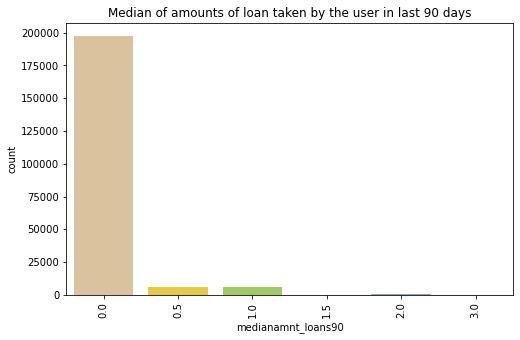

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df['medianamnt_loans90'],palette='Set2_r')
plt.xticks(rotation=90)
plt.title('Median of amounts of loan taken by the user in last 90 days')
plt.show()

##### Bivariate Analysis

In [17]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'day', 'month'],
      dtype='object')

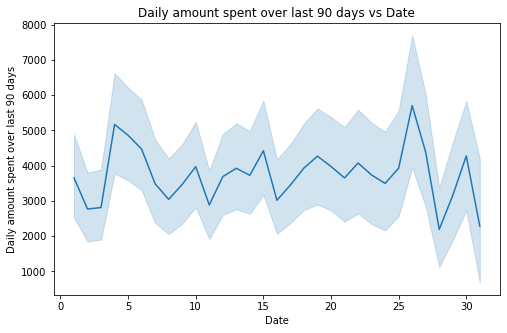

In [23]:
plt.figure(figsize=(8,5))
sns.lineplot(x="day", y="last_rech_date_ma", data=df)
plt.ylabel('Daily amount spent over last 90 days')
plt.xlabel('Date')
plt.title("Daily amount spent over last 90 days vs Date", fontsize=12)
plt.show()

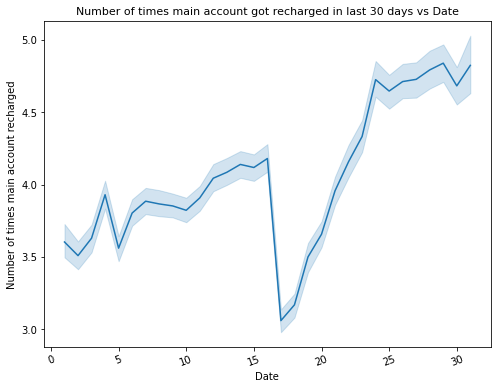

In [24]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="day", y="cnt_ma_rech30", data=df)
plt.ylabel('Number of times main account recharged')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.title("Number of times main account got recharged in last 30 days vs Date", fontsize=11)
plt.show()

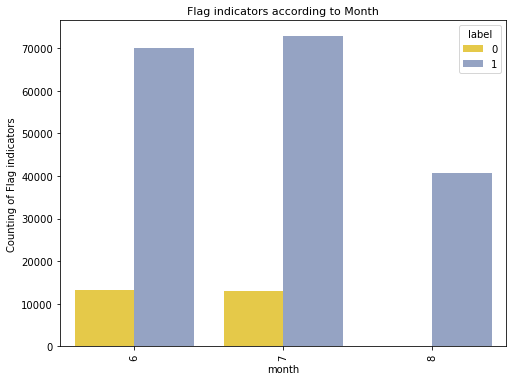

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='month', hue='label', data=df, palette='Set2_r')
plt.title("Flag indicators according to Month", fontsize=11)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

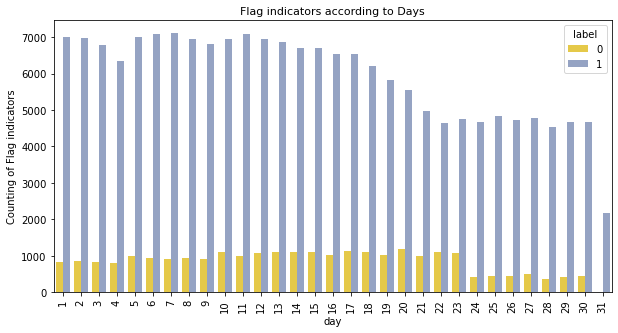

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='day', hue='label', data=df, palette='Set2_r')
plt.title("Flag indicators according to Days", fontsize=11)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

### Multivariate Analysis

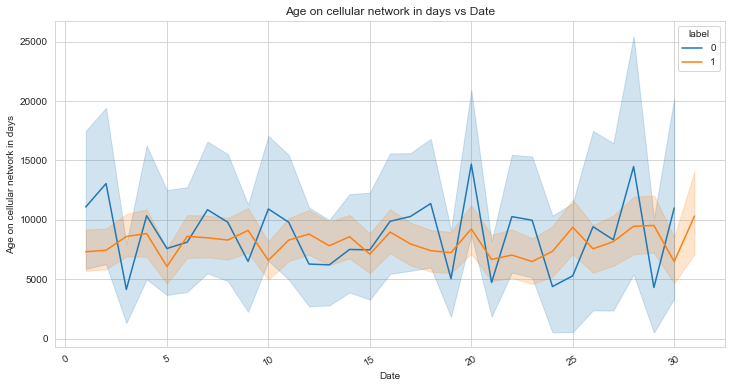

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(x="day", y="aon",hue='label', data=df)
plt.ylabel('Age on cellular network in days')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.title("Age on cellular network in days vs Date", fontsize=12)
plt.show()

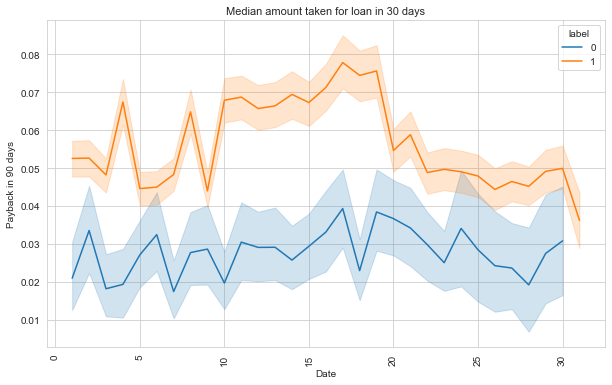

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(x="day", y="medianamnt_loans30",hue='label', data=df)
plt.ylabel('Payback in 90 days')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Median amount taken for loan in 30 days", fontsize=11)
plt.show()

Text(0.5, 1.0, 'maxamnt_loans90 VS aon')

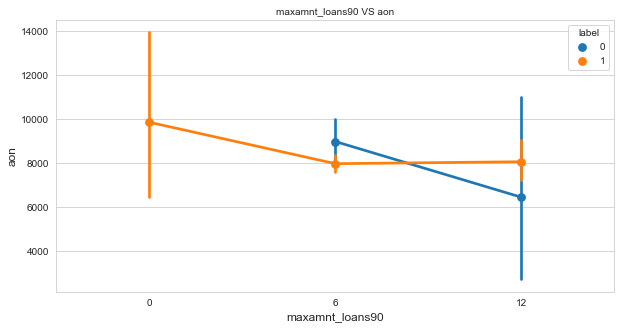

In [30]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='aon', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('aon',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS aon",{'fontsize':10})

Text(0.5, 1.0, 'maxamnt_loans90 VS payback90')

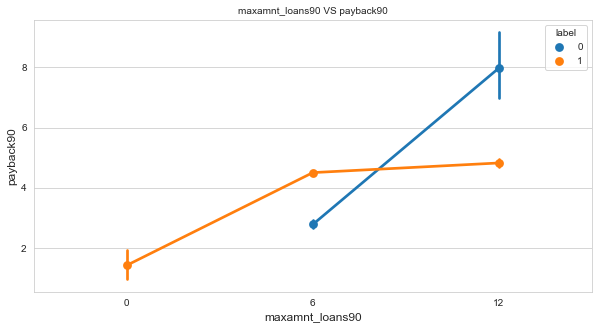

In [31]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='payback90', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('payback90',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS payback90",{'fontsize':10})

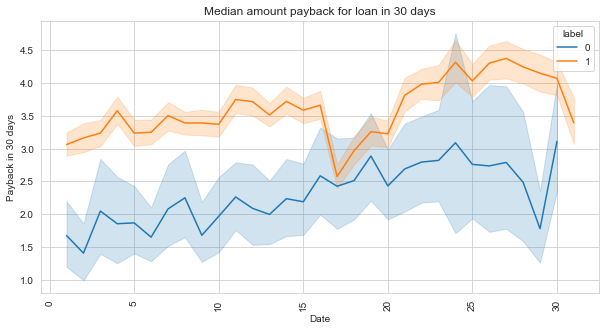

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x="day", y="payback30",hue='label', data=df)
plt.ylabel('Payback in 30 days')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Median amount payback for loan in 30 days", fontsize=12)
plt.show()

# EDA

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
count,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000
mean,0.875297,8113.512796,5382.170031,6083.386523,2692.964058,3483.905668,3756.403389,3712.752058,2064.754512,3.978622,3737.907974,7705.599512,1813.078774,3852.497291,6.316341,7.717916,12398.010741,1864.864303,92.038696,262.616952,3750.049100,0.041501,0.045719,2.759226,17.953703,274.698489,0.054037,18.523497,23.647923,6.703238,0.046084,3.399125,4.321920,14.399514,6.797406
std,0.330383,75701.620014,9221.086606,10919.382966,4308.784971,5770.737718,53909.859829,53378.762010,2370.831005,4.256138,53647.573470,10139.952367,2070.904097,54010.348531,7.193605,12.590836,16858.386213,2081.714948,369.241324,4184.206206,53889.381122,0.397585,0.951456,2.554603,17.380433,4245.577376,0.218054,224.813949,26.470977,2.104003,0.200706,8.813867,10.308399,8.438943,0.741434
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.480000,42.713250,280.800000,300.370000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.620000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1470.465667,1500.000000,1083.940000,1334.400000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.955000,4.000000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7246.000000,7804.000000,3357.452500,4202.537500,7.000000,0.000000,2309.000000,5.000000,6.000000,10011.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.330000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000


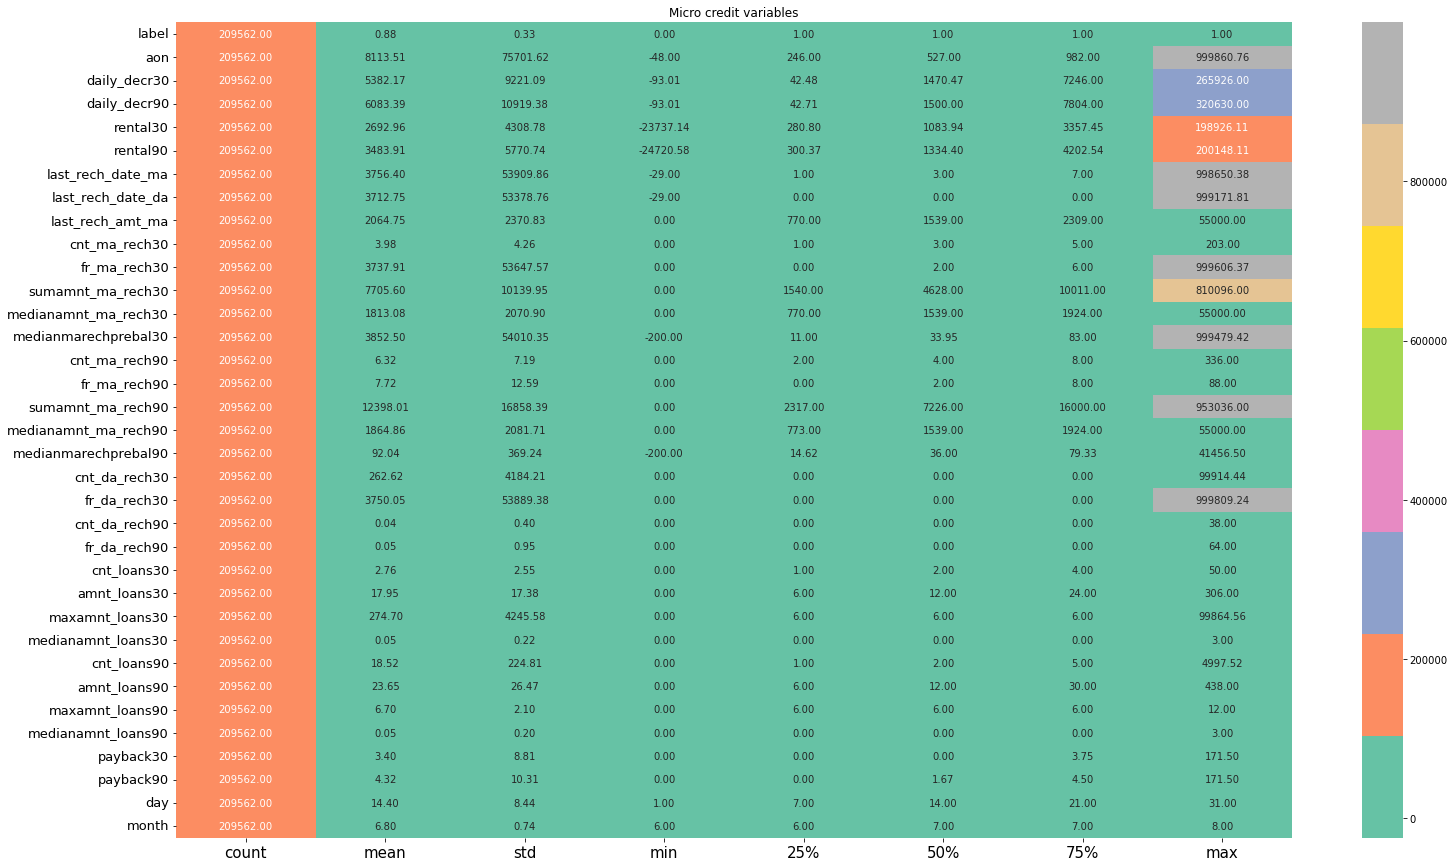

In [11]:
plt.figure(figsize=(25,15))
sns.heatmap(df.describe().transpose(),annot=True,fmt='0.2f',cmap='Set2')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Micro credit variables")
plt.show()

In the above heatmap:
- Standard deviation is highest for ‘aon’, while it is least for ‘medianamnt_loans90’ and ‘medianamnt_loans30’.
- In the columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, maxamnt_loans30, cnt_loans90,amnt_loans90 mean is considerably greater than median so the columns are positively skewed.
- In the columns label and month median is greater than mean so the columns are negatively skewed.
- In the columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, maxamnt_loans30, cnt_loans90, payback30, payback90 there is huge difference present between 75th perecentile and maximum so outliers must be present.

### Check Correlation of columns with the target:

In [12]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
label,1.000000,-0.003825,0.168174,0.166034,0.057886,0.075339,0.003705,0.001687,0.131558,0.237120,0.001306,2.026578e-01,0.141248,-4.857156e-03,0.236200,0.084205,0.205634,0.120594,0.039228,0.003806,-0.000052,0.002962,-0.005438,0.196133,0.197123,0.000225,0.044521,0.004707,0.199649,0.084064,0.035681,0.048213,0.049050,0.006630,0.154707
aon,-0.003825,1.000000,0.001096,0.000366,-0.000969,-0.000799,0.001691,-0.001694,0.004243,-0.003162,-0.001164,6.959538e-04,0.004293,3.929212e-03,-0.002738,0.004391,0.001000,0.004896,-0.000862,0.001563,0.000891,0.001120,0.005394,-0.001836,-0.001736,-0.002765,0.004660,-0.000612,-0.002329,-0.001196,0.002767,0.001936,0.002199,0.000655,-0.001875
daily_decr30,0.168174,0.001096,1.000000,0.977703,0.442038,0.458950,0.000481,-0.001641,0.275787,0.451347,-0.000582,6.365153e-01,0.295307,-1.158998e-03,0.587312,-0.078354,0.762969,0.257794,0.037476,0.000695,-0.001505,0.038806,0.020669,0.366081,0.471463,-0.000033,-0.011631,0.008956,0.563473,0.400184,-0.037325,0.026891,0.047148,0.006437,0.518648
daily_decr90,0.166034,0.000366,0.977703,1.000000,0.434658,0.471705,0.000903,-0.001892,0.264082,0.426670,-0.000348,6.038644e-01,0.282912,-7.519613e-04,0.593046,-0.079582,0.768805,0.250467,0.036364,0.000656,-0.001575,0.031148,0.016433,0.340352,0.447840,0.000020,-0.005611,0.009440,0.567182,0.397237,-0.034705,0.019377,0.040775,-0.021549,0.539398
rental30,0.057886,-0.000969,0.442038,0.434658,1.000000,0.955235,-0.001101,0.003255,0.127204,0.233281,-0.001225,2.725996e-01,0.129785,-1.421794e-03,0.312066,-0.033586,0.342263,0.110286,0.027148,-0.001110,-0.002564,0.072248,0.046759,0.180153,0.233406,-0.000870,-0.016505,0.004005,0.298902,0.234190,-0.035510,0.072942,0.095114,0.036494,0.365665
rental90,0.075339,-0.000799,0.458950,0.471705,0.955235,1.000000,-0.001694,0.002788,0.121351,0.230199,-0.000509,2.596613e-01,0.120176,-1.242921e-03,0.345245,-0.036579,0.360560,0.103082,0.029527,-0.000553,-0.002351,0.056275,0.036883,0.171546,0.231861,-0.001417,-0.009488,0.005134,0.327397,0.251008,-0.034143,0.067083,0.099473,0.008898,0.429382
last_rech_date_ma,0.003705,0.001691,0.000481,0.000903,-0.001101,-0.001694,1.000000,0.001790,-0.000156,0.004302,-0.001630,2.097521e-03,-0.001367,4.070305e-03,0.004254,0.001408,0.002236,-0.000735,-0.001088,-0.003468,-0.003627,-0.003539,-0.002396,0.001186,0.000896,0.000928,0.001833,-0.000226,0.000863,-0.001126,0.002768,-0.002235,-0.001586,0.000556,-0.001215
last_rech_date_da,0.001687,-0.001694,-0.001641,-0.001892,0.003255,0.002788,0.001790,1.000000,-0.000158,0.001540,0.001157,3.855914e-05,0.001028,2.848181e-03,0.001263,0.000792,-0.000422,0.000210,0.004156,-0.003628,-0.000074,-0.001860,-0.000204,0.000373,0.000529,0.000502,0.000059,-0.000973,0.000512,0.001520,-0.002241,0.000075,0.000414,0.000626,-0.001808
last_rech_amt_ma,0.131558,0.004243,0.275787,0.264082,0.127204,0.121351,-0.000156,-0.000158,1.000000,-0.002778,0.002868,4.407687e-01,0.794624,-2.350842e-03,0.016599,0.106198,0.418682,0.818714,0.124622,-0.001845,-0.003239,0.014767,0.016037,-0.027699,0.008418,0.000992,0.028341,0.000083,0.013985,0.148427,0.020976,-0.027408,-0.014304,0.028825,0.096832
cnt_ma_rech30,0.237120,-0.003162,0.451347,0.426670,0.233281,0.230199,0.004302,0.001540,-0.002778,1.000000,0.001660,6.569527e-01,-0.011910,7.251286e-05,0.886421,-0.152855,0.584021,-0.051473,0.013431,0.002298,-0.002741,0.011968,0.006983,0.765783,0.752277,0.000101,-0.067048,0.014694,0.685232,0.174072,-0.071486,0.043565,0.017304,0.068582,0.156061


<AxesSubplot:>

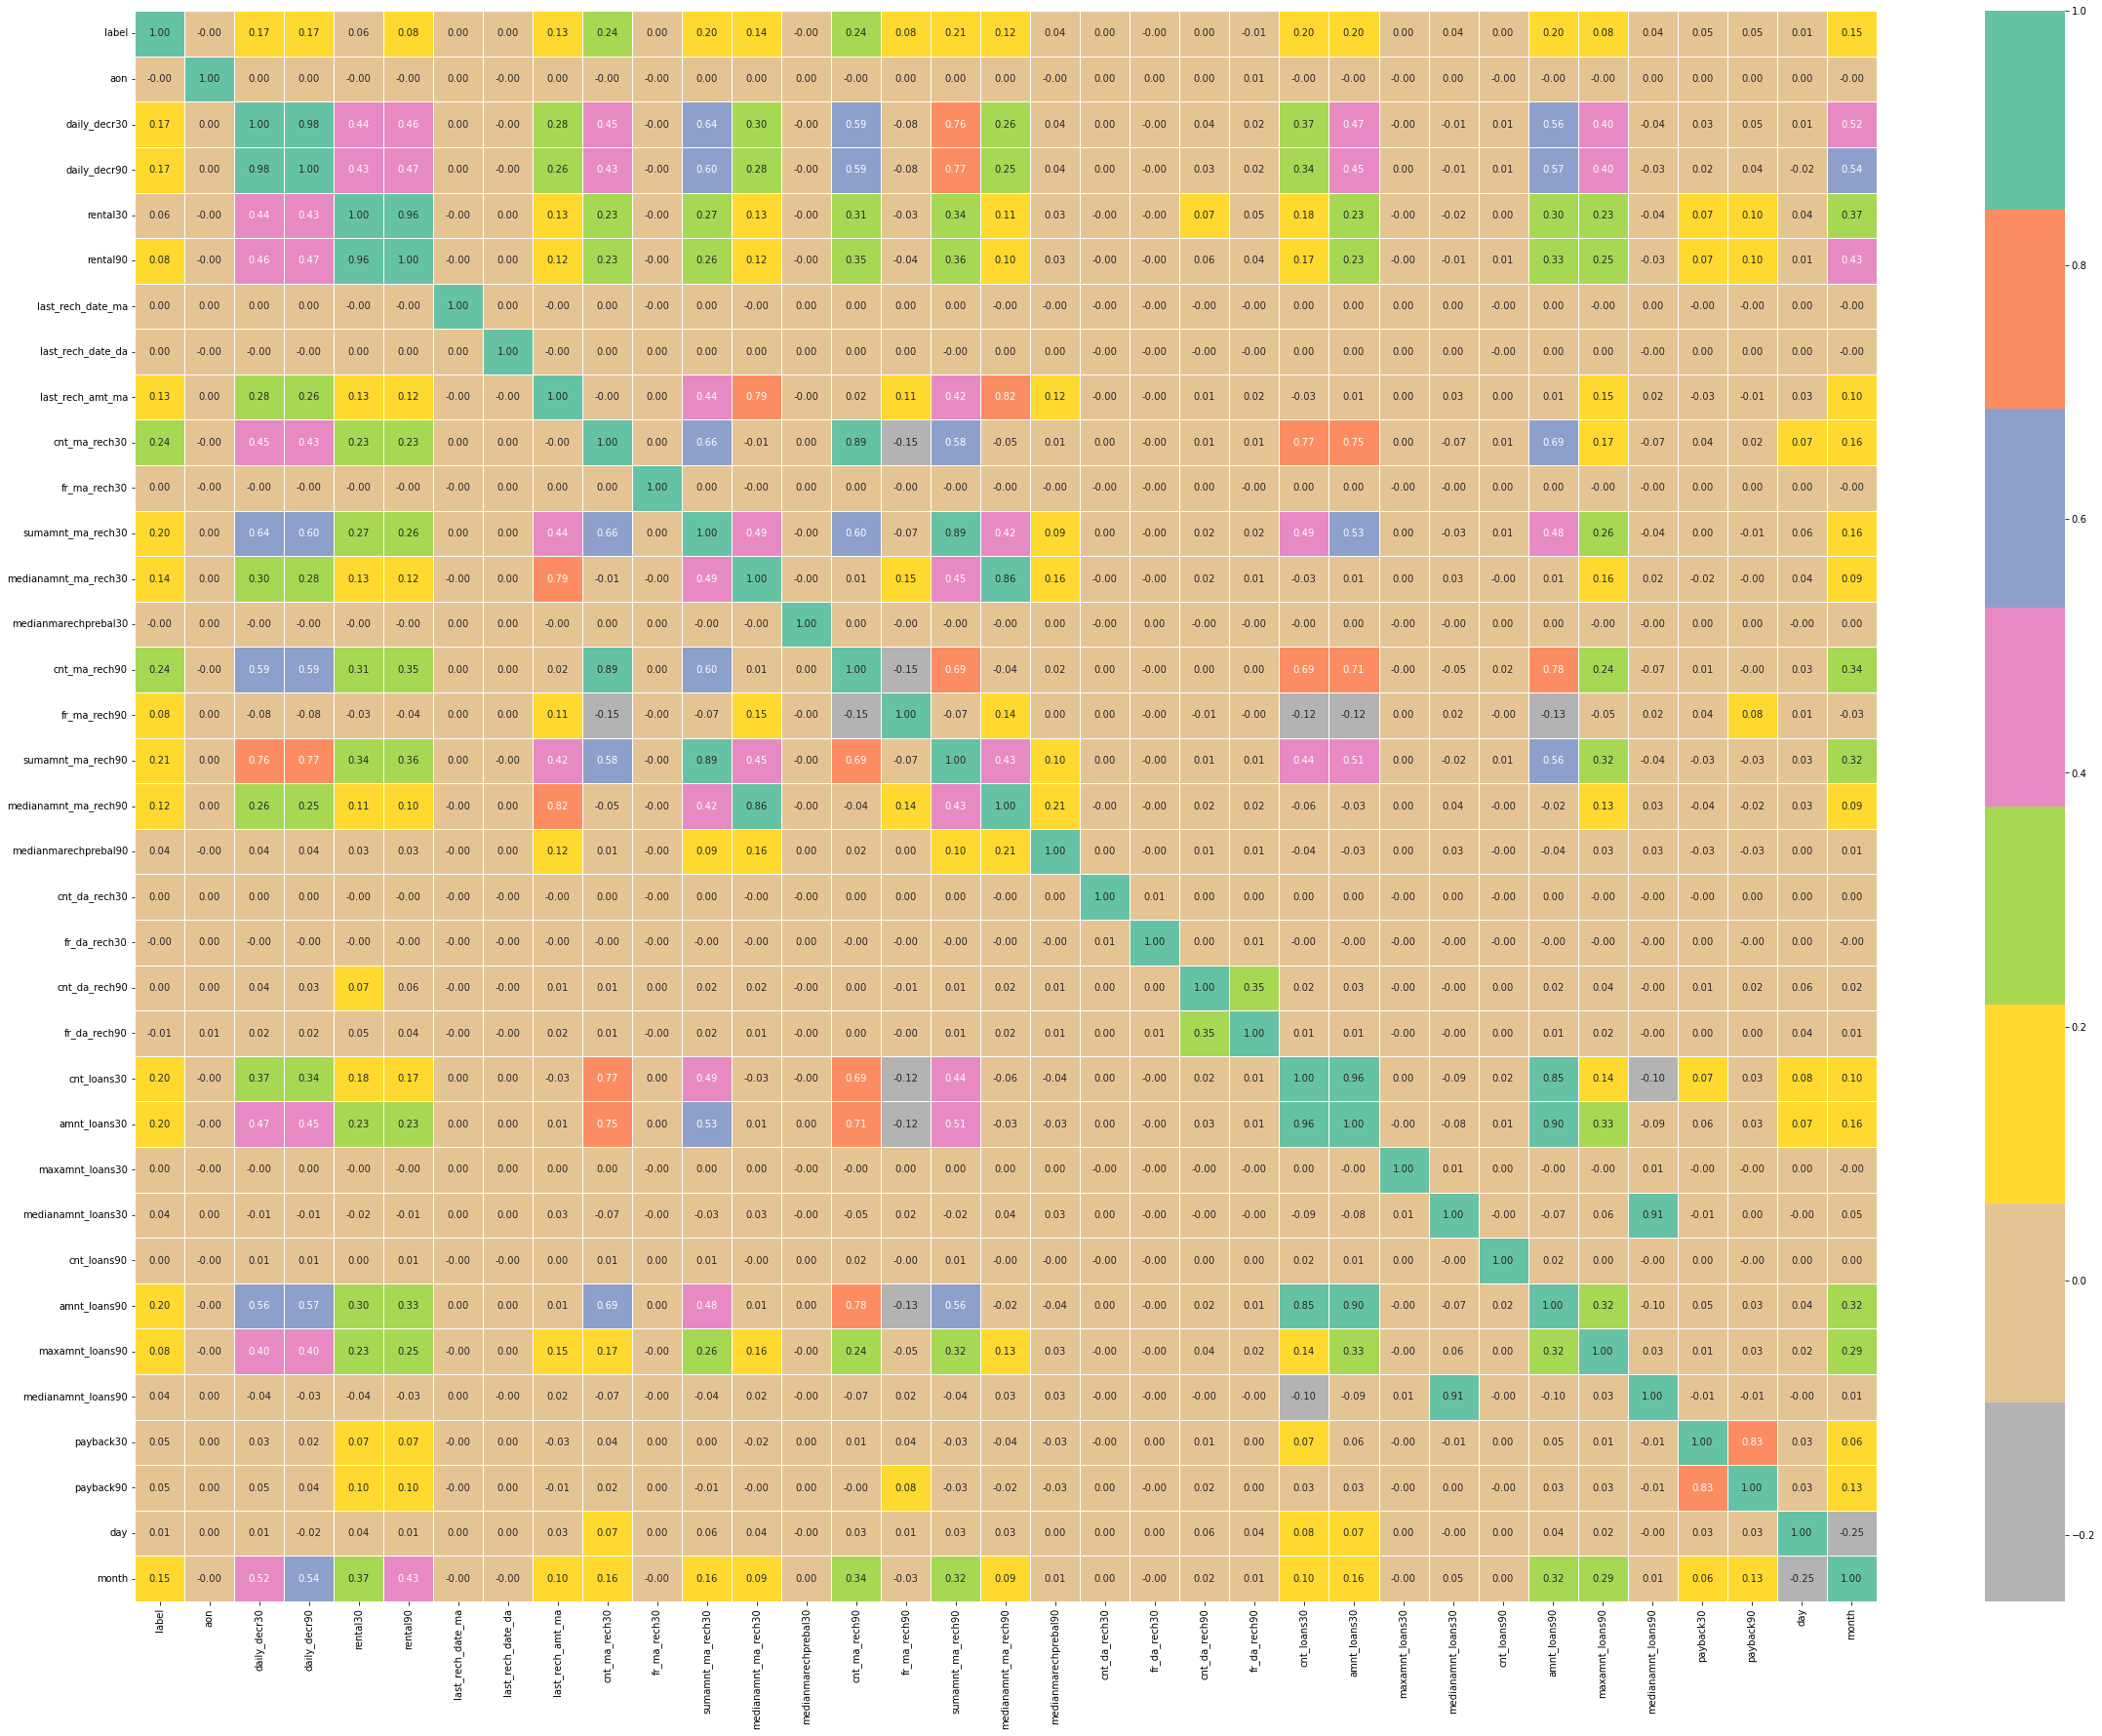

In [13]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),cmap='Set2_r',annot=True,linewidth=0.5,fmt='0.2f')

- We observed that the columns cnt_ma_rech30 and cnt_ma_rech90 are highly positively correlated with label this means as the cnt_ma_rech30 and cnt_ma_rech90 are increasing the probability of customer being non-fraudulent is also increasing.
- We also observed that the columns aon, medianmarechprebal30 and fr_da_rech90 are negatively correlated with label this means as the aon, medianmarechprebal30 and fr_da_rech90 are increasing the probability of customer being fraudulent is also increasing.

In [14]:
df.corr()['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237120
cnt_ma_rech90           0.236200
sumamnt_ma_rech90       0.205634
sumamnt_ma_rech30       0.202658
amnt_loans90            0.199649
amnt_loans30            0.197123
cnt_loans30             0.196133
daily_decr30            0.168174
daily_decr90            0.166034
month                   0.154707
medianamnt_ma_rech30    0.141248
last_rech_amt_ma        0.131558
medianamnt_ma_rech90    0.120594
fr_ma_rech90            0.084205
maxamnt_loans90         0.084064
rental90                0.075339
rental30                0.057886
payback90               0.049050
payback30               0.048213
medianamnt_loans30      0.044521
medianmarechprebal90    0.039228
medianamnt_loans90      0.035681
day                     0.006630
cnt_loans90             0.004707
cnt_da_rech30           0.003806
last_rech_date_ma       0.003705
cnt_da_rech90           0.002962
last_rech_date_da       0.001687
fr_ma_rech30            0.001306
maxamnt_lo

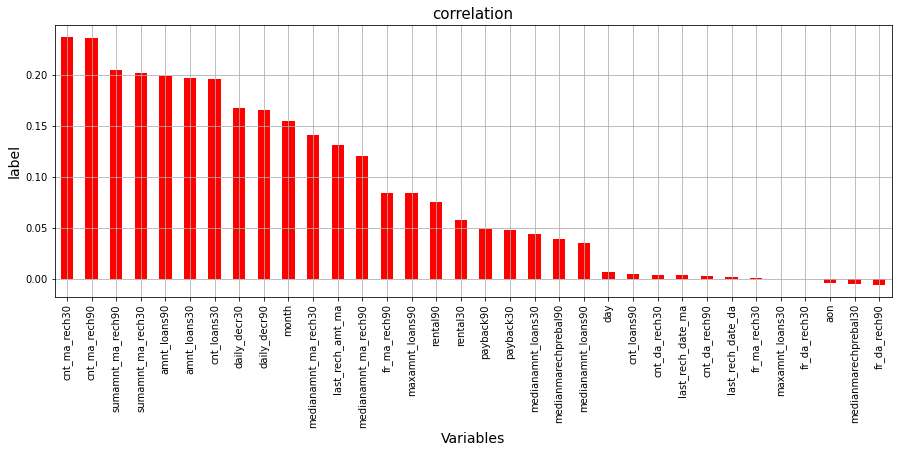

In [15]:
plt.figure(figsize=(15,5))
df.corr()["label"].sort_values(ascending=False).drop(['label']).plot(kind='bar', color='red',grid=True)
plt.xlabel('Variables',fontsize=14)
plt.ylabel("label",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

## Checking Outliers
We will use the Zscore method, where we keep the threshold for the outliers as 6.

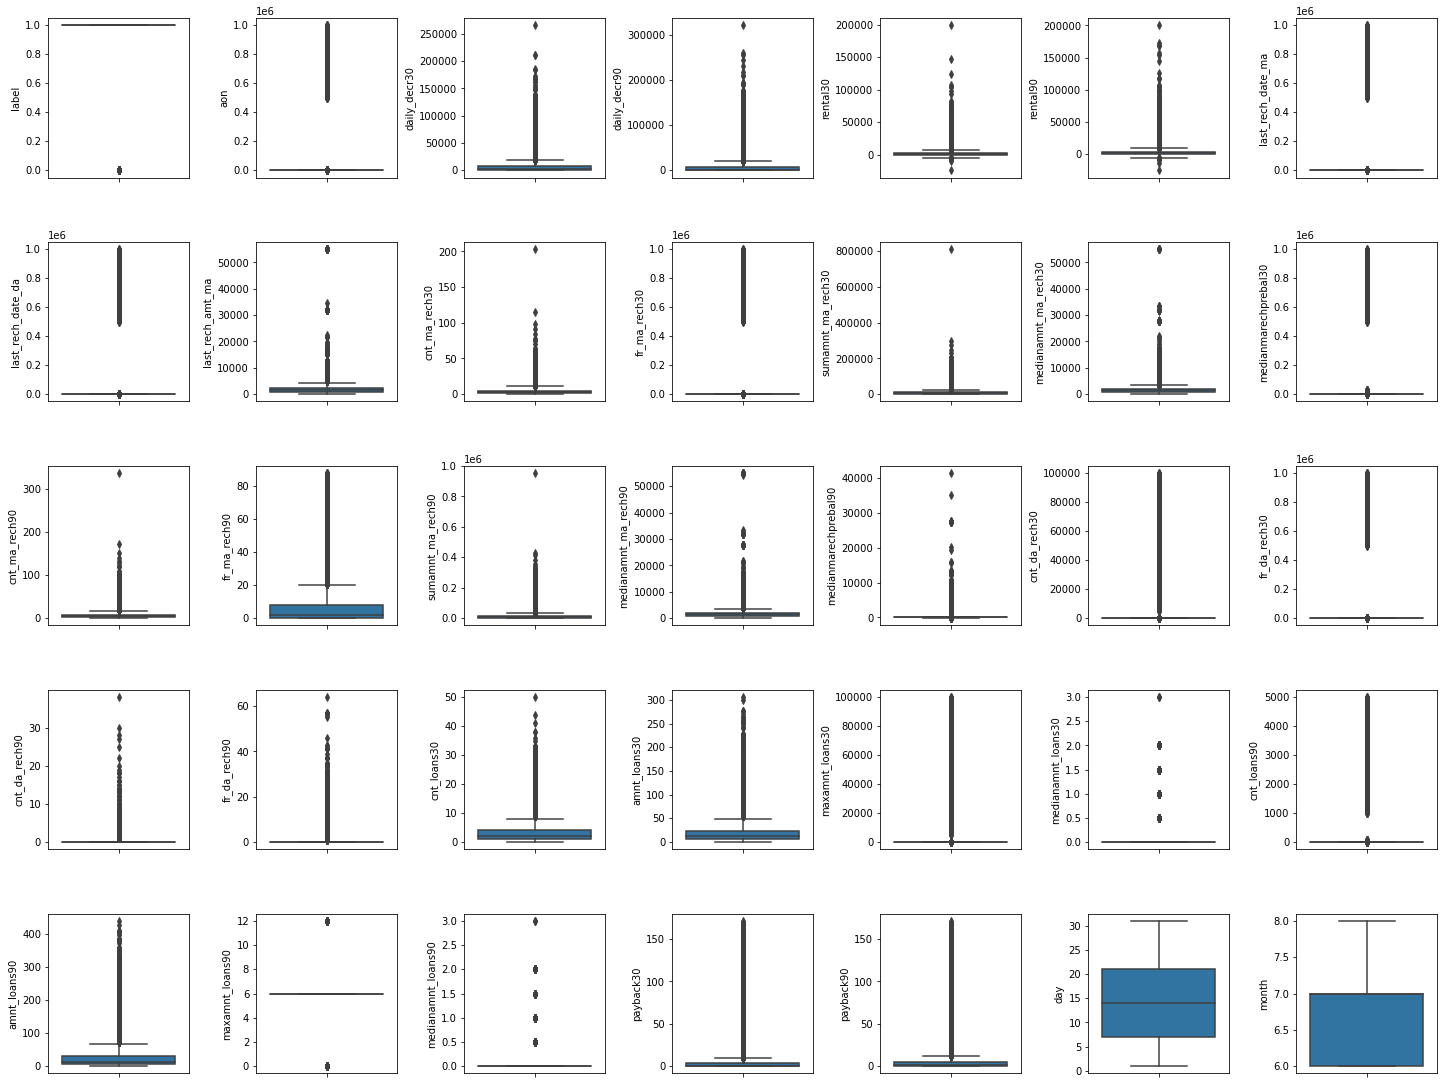

In [16]:
fig, ax = plt.subplots(ncols=7, nrows=5, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=6
(np.where(z>6))

DF=df[(z<6).all(axis=1)]

In [18]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (209562, 35)
New_DF: (193875, 35)
total dropped rows: 15687


### Percentage data loss

In [19]:
loss_percent=(209562-193875)/193875*100
print(loss_percent,'%')

8.09129593810445 %


## Check Skewness

In [20]:
x=DF.drop('label',axis=1)
y=DF['label']

In [21]:
x.shape,y.shape

((193875, 34), (193875,))

In [22]:
x.skew()

aon                      0.947758
daily_decr30             2.453587
daily_decr90             2.594913
rental30                 2.631232
rental90                 2.759101
last_rech_date_ma        3.107282
last_rech_date_da        9.967052
last_rech_amt_ma         2.248340
cnt_ma_rech30            1.829432
fr_ma_rech30             2.015235
sumamnt_ma_rech30        2.280010
medianamnt_ma_rech30     2.455302
medianmarechprebal30    10.837951
cnt_ma_rech90            1.989286
fr_ma_rech90             2.259668
sumamnt_ma_rech90        2.353928
medianamnt_ma_rech90     2.467532
medianmarechprebal90     5.478768
cnt_da_rech30           34.807421
fr_da_rech30            88.486569
cnt_da_rech90            7.423611
fr_da_rech90            68.980093
cnt_loans30              2.061372
amnt_loans30             2.093381
maxamnt_loans30         36.617557
medianamnt_loans30       4.081899
cnt_loans90             44.701974
amnt_loans90             2.333297
maxamnt_loans90          1.733629
medianamnt_loa

In [23]:
from sklearn.preprocessing import power_transform
x1=power_transform(x)
x1

array([[-0.72476991,  0.43189701,  0.40219037, ...,  1.8315063 ,
         0.71602383,  0.42232848],
       [ 0.24927698,  1.15847832,  1.09770197, ..., -1.00976017,
        -0.40291678,  1.48936665],
       [-0.10838514,  0.0957197 ,  0.07622185, ..., -1.00976017,
         0.61551199,  1.48936665],
       ...,
       [ 0.79685137,  1.14459116,  1.08723906, ...,  0.77572305,
         1.54818578,  0.42232848],
       [ 1.92412174,  1.17632519,  1.11857231, ...,  1.37239941,
         1.1926301 ,  0.42232848],
       [ 1.70256378,  0.61636992,  0.58300016, ..., -1.00976017,
        -0.81257615,  0.42232848]])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
   

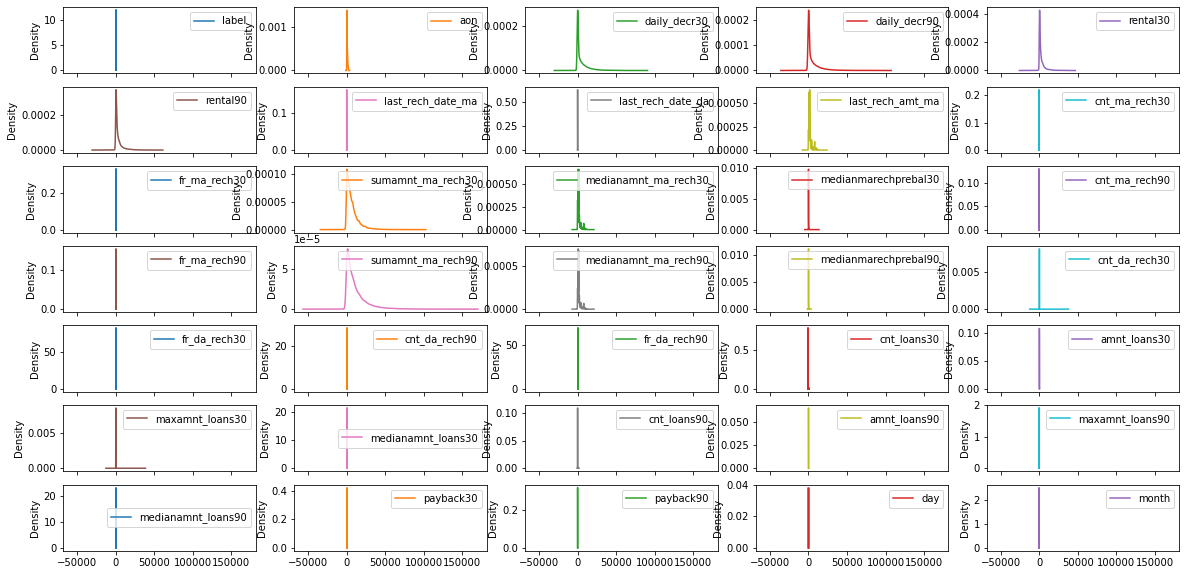

In [24]:
DF.plot(kind='kde',subplots=True,layout=(7,5),figsize=(20,10))

- No skewness anymore

## SMOTE

In [25]:
# oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

<AxesSubplot:xlabel='label', ylabel='count'>

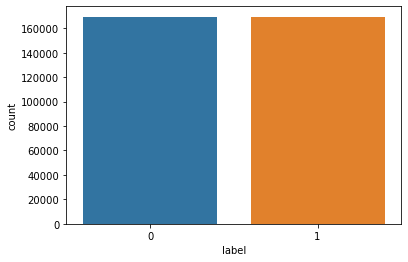

In [26]:
sns.countplot(y)

- Target column is balanced

### Multicollinearity check

In [27]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [28]:
x.shape,y.shape, x.shape[1]

((338982, 34), (338982,), 34)

In [29]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_calc()

    VIF Factor              features
0     2.655213                   aon
1    41.540343          daily_decr30
2    45.435301          daily_decr90
3    23.226583              rental30
4    24.449712              rental90
5     2.022627     last_rech_date_ma
6     1.661581     last_rech_date_da
7     7.855600      last_rech_amt_ma
8    28.778352         cnt_ma_rech30
9     1.768890          fr_ma_rech30
10   21.586202     sumamnt_ma_rech30
11   10.274693  medianamnt_ma_rech30
12    2.299861  medianmarechprebal30
13   30.205794         cnt_ma_rech90
14    1.557542          fr_ma_rech90
15   23.501442     sumamnt_ma_rech90
16   12.259091  medianamnt_ma_rech90
17    2.435999  medianmarechprebal90
18    1.001066         cnt_da_rech30
19    2.440781          fr_da_rech30
20    1.729267         cnt_da_rech90
21    2.482900          fr_da_rech90
22   60.450252           cnt_loans30
23   75.962946          amnt_loans30
24    1.001827       maxamnt_loans30
25    7.445919    medianamnt_loans30
2

## Scaling The Data using Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-0.68806506, -0.04532106, -0.08550072, ...,  4.06270101,
         0.76119358,  0.53726381],
       [ 0.2296259 ,  1.36905645,  1.13835774, ..., -0.47159477,
        -0.5242486 ,  2.03426987],
       [-0.13953615, -0.30380868, -0.31071548, ..., -0.47159477,
         0.63264936,  2.03426987],
       ...,
       [ 0.04805402, -0.52140875, -0.49915722, ..., -0.47159477,
         0.50410515, -0.95974224],
       [ 0.14471864, -0.28609658, -0.2953768 , ..., -0.47159477,
         0.76119358,  0.53726381],
       [-1.00380249, -0.52250293, -0.50010478, ..., -0.47159477,
         1.91809155, -0.95974224]])

## PCA
To reduce the dimentionality of the columns.

In [31]:
covariance_matrix = PCA(n_components = len(x.columns))
covariance_matrix.fit(x1)

PCA(n_components=34)

In [32]:
pca = PCA(n_components=34,svd_solver="full")
X=pca.fit_transform(x1)
X

array([[ 0.42313168, -0.2605743 ,  3.27875968, ..., -0.02268518,
        -0.02533624,  0.00784416],
       [ 2.02251071,  3.578609  ,  0.84849918, ..., -0.08094513,
        -0.13514824, -0.03259508],
       [-1.21913584,  0.35304084,  0.23855374, ...,  0.04088704,
         0.02118   ,  0.0243108 ],
       ...,
       [-1.71782647,  0.91368993, -1.44331648, ...,  0.07763746,
        -0.02113695, -0.01968489],
       [-1.44622055,  0.60153103, -0.07725373, ...,  0.03291548,
         0.00414448, -0.01269687],
       [-2.66666828, -0.98580654, -0.66711991, ..., -0.02519685,
        -0.01708823,  0.0153148 ]])

In [33]:
X.shape,y.shape

((338982, 34), (338982,))

In [34]:
type(X),type(y)

(numpy.ndarray, pandas.core.series.Series)

I'll convert the x variable in pd dataframe too.

In [35]:
x=pd.DataFrame(X)

# Training of the data

Since it is a binary problem, we will use logistic regression method

### Finding the best random fit

In [36]:
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived
LR=LogisticRegression()

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=i)
    LR.fit(x_train,y_train) #training the model
    predlr=LR.predict(x_test) #predicted target variable
    acc=accuracy_score(y_test,predlr)
    if acc>MaxAcu:
        MaxAcu=acc
        MaxRS=i 
print(f"At random state {i} the Maximum accuracy score is: {accuracy_score(y_test,predlr)*100}")

At random state 99 the Maximum accuracy score is: 80.3322501959334


##### At random state 99 the Maximum accuracy score is: 80.33%

### Moving on with the train test split and checking other algorithms and ensemble methods

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=99)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((111864, 34), (227118, 34), (111864,), (227118,))

In [47]:
model=[RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),
       AdaBoostClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    Accuracy_score=accuracy_score(y_test,pred)*100
    print(Accuracy_score)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    #Cross Validation Score
    cv_score = (cross_val_score(m, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    #Result of Accuracy score minus cv scores
    result = Accuracy_score - cv_score
    print("For model",m,"Accuracy Score - Cross Validation Score is", result)
    print("--"*10)

Accuracy Score of RandomForestClassifier() is:
89.21793957326148
[[101320  12235]
 [ 12253 101310]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    113555
           1       0.89      0.89      0.89    113563

    accuracy                           0.89    227118
   macro avg       0.89      0.89      0.89    227118
weighted avg       0.89      0.89      0.89    227118

Cross Validation Score: 91.33377017936711
For model RandomForestClassifier() Accuracy Score - Cross Validation Score is -2.1158306061056322
--------------------
Accuracy Score of KNeighborsClassifier() is:
85.06987557128893
[[102865  10690]
 [ 23219  90344]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86    113555
           1       0.89      0.80      0.84    113563

    accuracy                           0.85    227118
   macro avg       0.86      0.85      0.85    227118
weighted avg       0.86      0.85      0.8

### AdaBoost Classifier gives best similar accurate score with the CV score after Cross validation of all the tried algorithmns.

## Hyper parameter tuning the best 3 algorithms.
#### Random Forest

In [50]:
#creating parameters for Random forest to pass in Grid search
para={'max_depth':[4,5],'criterion':["gini","entropy"],'n_estimators':[100,150]}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),para,cv=5)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}

In [38]:
#Final Model:
FM=RandomForestClassifier(criterion= 'gini',max_depth=5, n_estimators=150)
FM.fit(x_train,y_train)
pred=FM.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred)*100)
print("Best Accuracy Score for GCV best estimator", FM, "is",accuracy_score(y_test,pred)*100)

Accuracy Score: 82.27221092119515
Best Accuracy Score for GCV best estimator RandomForestClassifier(max_depth=5, n_estimators=150) is 82.27221092119515


In [39]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[91249 22306]
 [17957 95606]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82    113555
           1       0.81      0.84      0.83    113563

    accuracy                           0.82    227118
   macro avg       0.82      0.82      0.82    227118
weighted avg       0.82      0.82      0.82    227118



### AdaBoost

In [40]:
#creating parameters for AdaBoost to pass in Grid search
para={'base_estimator':[None,'DecisionTreeClassifier'],'algorithm':["SAMME","SAMME.R"],'n_estimators':[300,400,500]}

In [41]:
GCV=GridSearchCV(AdaBoostClassifier(),para,cv=5)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'algorithm': 'SAMME.R', 'base_estimator': None, 'n_estimators': 500}

In [42]:
#Final Model:
FM1=AdaBoostClassifier(algorithm= 'SAMME.R',base_estimator=None, n_estimators=500)
FM1.fit(x_train,y_train)
predab=FM1.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predab)*100)
print("Best Accuracy Score for GCV best estimator", FM1, "is",accuracy_score(y_test,predab)*100)

Accuracy Score: 85.40582428517335
Best Accuracy Score for GCV best estimator AdaBoostClassifier(n_estimators=500) is 85.40582428517335


In [45]:
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

[[98945 14610]
 [18536 95027]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86    113555
           1       0.87      0.84      0.85    113563

    accuracy                           0.85    227118
   macro avg       0.85      0.85      0.85    227118
weighted avg       0.85      0.85      0.85    227118



### Extra Trees

In [46]:
#creating parameters for Extra Trees to pass in Grid search
para={'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[4,5,6],'n_estimators':[10,50,100]}

In [47]:
GCV=GridSearchCV(ExtraTreesClassifier(),para,cv=5)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100}

In [51]:
#Final Model:
FM2=ExtraTreesClassifier(criterion= 'entropy',max_depth=6, n_estimators=100)
FM2.fit(x_train,y_train)
predet=FM2.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predet)*100)
print("Best Accuracy Score for GCV best estimator", FM2, "is",accuracy_score(y_test,predet)*100)

Accuracy Score: 76.62228445125442
Best Accuracy Score for GCV best estimator ExtraTreesClassifier(criterion='entropy', max_depth=6) is 76.62228445125442


In [52]:
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

[[95704 17851]
 [35244 78319]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78    113555
           1       0.81      0.69      0.75    113563

    accuracy                           0.77    227118
   macro avg       0.77      0.77      0.76    227118
weighted avg       0.77      0.77      0.76    227118



## AUC/ROC Curves

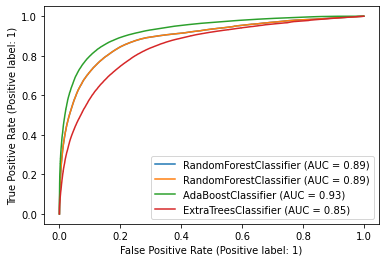

In [62]:
from sklearn.metrics import plot_roc_curve

graph = plot_roc_curve(FM,x_test,y_test)
model= [FM, FM1,FM2]

for i in model:
    plot_roc_curve(i,x_test,y_test, ax=graph.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

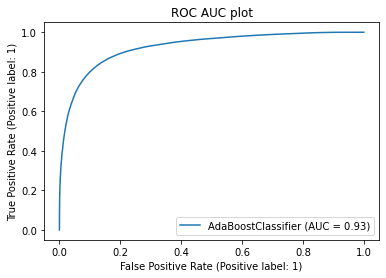

In [63]:
ar = metrics.plot_roc_curve(FM1, x_test, y_test)
plt.title("ROC AUC plot")
plt.show()

- The Area Under the curve in the AUC/ROC curve is 93% for AdaBoost Classifier

## Saving the best Classification model

In [67]:
#saving the model 
import joblib
joblib.dump(FM1,'MicroCredit.pkl')

['MicroCredit.pkl']

In [70]:
LoadModel = joblib.load('MicroCredit.pkl')

In [73]:
a = np.array(y_test)
predicted = np.array(LoadModel.predict(x_test))
Final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Final[:20]

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,0
9,1,1


#### Best Accuracy Score for GCV best estimator AdaBoostClassifier(n_estimators=500) is 85%

### Conclusion: 
- The accuracy score for the best model(AdaBoost Classifier) is 85%, which means the model works with accuracy at 85%.

## Thank you.